# Advertising Data/Purnendu Ghosh/MDS201811

In [87]:
import numpy as np

In [85]:
import pandas as pd

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
adv_data_raw=pd.read_csv('Advertising.csv')

In [40]:
adv_data_raw.shape

(200, 5)

In [41]:
adv_data_raw.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [42]:
adv_data=adv_data_raw.drop(['Unnamed: 0'],axis=1)

In [43]:
adv_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [44]:
x=adv_data[['TV','radio','newspaper']]

In [45]:
y=adv_data['sales']

# MULTIPLE LINEAR REGRESSION

scatter plots of various variables with respect to sales:


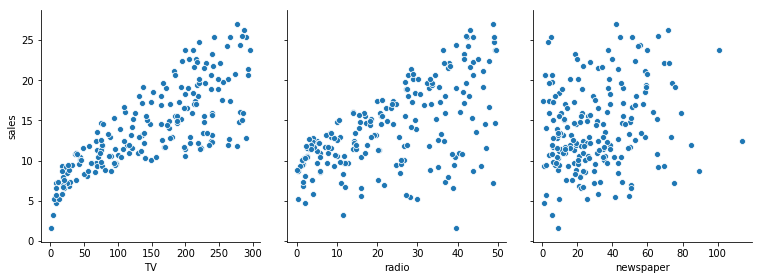

In [46]:
import seaborn as sns
print("scatter plots of various variables with respect to sales:")
sns.pairplot(adv_data_raw, x_vars=['TV','radio','newspaper'], y_vars='sales', size=4, aspect=0.9)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)
print("Shape of x is{}".format(x.shape))
print("shape of x_train,y_train is {}".format(x_train.shape,y_train.shape))
print("shape of x_test,y_test is {}".format(x_test.shape,y_test.shape))

Shape of x is(200, 3)
shape of x_train,y_train is (150, 3)
shape of x_test,y_test is (50, 3)


In [48]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
reg_model=linear_model.LinearRegression()
reg_model_fit=reg_model.fit(x_train,y_train)

In [49]:
y_predicted=reg_model.predict(x_test)
print('Coefficients: \n', reg_model.coef_)

Coefficients: 
 [ 0.04475545  0.19207935 -0.0085656 ]


In [50]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))

Mean squared error: 2.38


In [51]:
print('Variance score: %.2f' % r2_score(y_test, y_predicted))

Variance score: 0.92


In [52]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
cv_scores=cross_val_score(model,X=x_train,y=y_train,cv=5,n_jobs=4)
print(cv_scores)

[0.88280488 0.87506054 0.92656439 0.74226463 0.935911  ]


In [53]:
import statsmodels.api as sm
multiple_reg_accuracy=sm.OLS(y,x).fit()
multiple_reg_accuracy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          2.43e-171
Time:                        18:40:11   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From the above results we can conclude that as p-value of newspaper is greater than 0.01;
## it is not significant to predict sales at 1% level of significance

In [54]:
TV=adv_data[['TV']]
radio=adv_data[['radio']]
news=adv_data[['newspaper']]

In [55]:
TV_train, TV_test, y_train, y_test = train_test_split(TV, y, random_state=60)
radio_train, radio_test, y_train, y_test = train_test_split(radio, y, random_state=60)
news_train, news_test, y_train, y_test = train_test_split(news, y, random_state=60)

In [56]:
print("shape of TV is {}".format(TV.shape))
print("shape of radio is {}".format(radio.shape))
print("shape of news is {}".format(news.shape))
print("shape of TV_train,y_train is {}".format(TV_train.shape,y_train.shape))
print("shape of radio_train,y_train is {}".format(radio_train.shape,y_train.shape))
print("shape of news_train,y_train is {}".format(news_train.shape,y_train.shape))
print("shape of TV_test,y_test is {}".format(TV_test.shape,y_test.shape))

shape of TV is (200, 1)
shape of radio is (200, 1)
shape of news is (200, 1)
shape of TV_train,y_train is (150, 1)
shape of radio_train,y_train is (150, 1)
shape of news_train,y_train is (150, 1)
shape of TV_test,y_test is (50, 1)


# SIMPLE LINEAR REGRESSION USING VARIABLE 'TV'

In [57]:
reg_modelTv_fit=reg_model.fit(TV_train,y_train)

In [58]:
y_predictedTv=reg_model.predict(TV_test)
print('Coefficients: \n', reg_model.coef_)

Coefficients: 
 [0.04600987]


In [59]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predictedTv))

Mean squared error: 10.57


In [60]:
print('Variance score: %.2f' % r2_score(y_test, y_predictedTv))

Variance score: 0.62


In [61]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
cv_scores=cross_val_score(model,X=TV_train,y=y_train,cv=5,n_jobs=4)
print(cv_scores)

[0.62671162 0.42132135 0.61071386 0.6590293  0.69952279]


In [62]:
simple_reg_accuracy_Tv=sm.OLS(y,TV).fit()
simple_reg_accuracy_Tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1733.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          3.52e-100
Time:                        18:40:25   Log-Likelihood:                -597.51
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     199   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Least Squares Line for TV


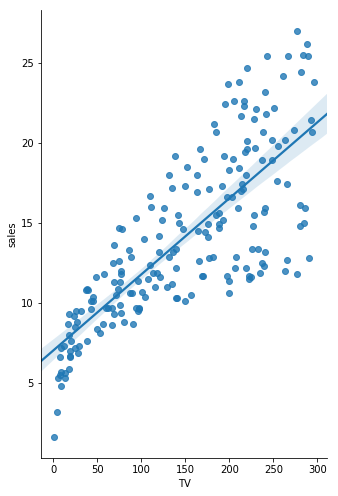

In [63]:
print("The Least Squares Line for TV")
sns.pairplot(adv_data_raw, x_vars=['TV'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Simple linear regression using variable radio

In [64]:
reg_modelradio_fit=reg_model.fit(radio_train,y_train)

In [65]:
y_predictedradio=reg_model.predict(radio_test)
print('Coefficients: \n', reg_model.coef_)

Coefficients: 
 [0.19850723]


In [66]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predictedradio))

Mean squared error: 17.80


In [67]:
print('Variance score: %.2f' % r2_score(y_test, y_predictedradio))

Variance score: 0.37


In [68]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
cv_scores=cross_val_score(model,X=radio_train,y=y_train,cv=3,n_jobs=3)
print(cv_scores)

[0.30154188 0.3007187  0.32698738]


In [69]:
simple_reg_accuracy_radio=sm.OLS(y,radio).fit()
simple_reg_accuracy_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     834.0
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.27e-73
Time:                        18:40:38   Log-Likelihood:                -660.13
No. Observations:                 200   AIC:                             1322.
Df Residuals:                     199   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radio          0.4873      0.017     28.879      0.000       0.454       0.521
==============================================================================
Omnibus:                       29.193   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.013
Skew:                          -1.014   Prob(JB):                     9.18e-09
Kurtosis:                       3.577   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Least Squares Line for Radio


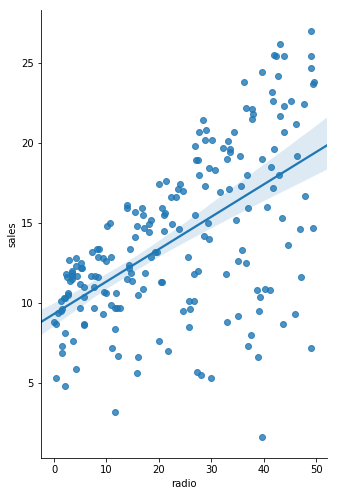

In [82]:
print("The Least Squares Line for Radio")
sns.pairplot(adv_data_raw, x_vars=['radio'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Simple linear regression using variable newspaper

In [71]:
reg_modelnews_fit=reg_model.fit(news_train,y_train)

In [72]:
y_predictednews=reg_model.predict(news_test)
print('Coefficients: \n', reg_model.coef_)

Coefficients: 
 [0.04328176]


In [73]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predictednews))

Mean squared error: 25.75


In [74]:
print('Variance score: %.2f' % r2_score(y_test, y_predictednews))

Variance score: 0.08


In [79]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
cv_scores=cross_val_score(model,X=news_train,y=y_train,cv=2,n_jobs=3)
print(cv_scores)

[ 0.03136235 -0.01654602]


In [80]:
simple_reg_accuracy_news=sm.OLS(y,news).fit()
simple_reg_accuracy_news.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     379.9
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.98e-48
Time:                        18:44:00   Log-Likelihood:                -718.04
No. Observations:                 200   AIC:                             1438.
Df Residuals:                     199   BIC:                             1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
newspaper      0.3232      0.017     19.492      0.000       0.291       0.356
==============================================================================
Omnibus:                       10.866   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.018
Skew:                          -0.418   Prob(JB):                      0.00149
Kurtosis:                       3.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""